In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 118.3 kB/s eta 0:00:0000:0100:11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 104.3 kB/s eta 0:00:00 0:00:03m
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4.2 which is incompatible.


In [1]:
import cv2
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
!pip install "numpy <2"

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 72.7 kB/s eta 0:00:0000:0100:07m
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [2]:
img = cv2.imread("/Users/210719/Downloads/argues.jpg", cv2.IMREAD_UNCHANGED)
img.shape

(267, 475, 3)

In [3]:
import matplotlib.pyplot as plt

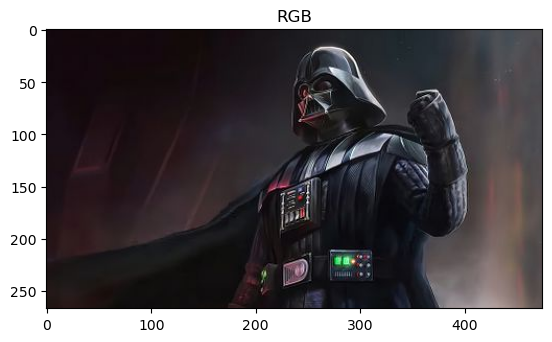

In [4]:
bgr_image = img[...,0:3]   # bgr_image: extracts the first three channels of the image (Blue, Green, Red).
alpha_image = img[...,-1]  # alpha_image: extracts the last channel, which represents the alpha (transparency) channel.

rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image); plt.title("RGB");

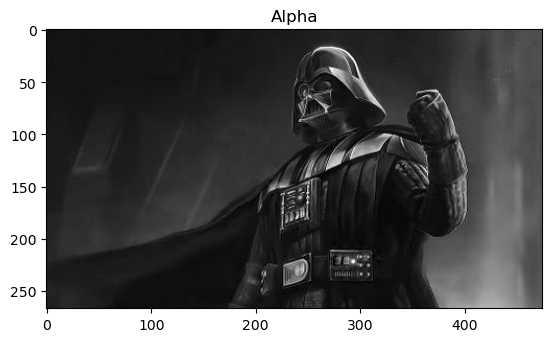

In [5]:
plt.imshow(alpha_image, cmap='gray'); plt.title("Alpha");

(-0.5, 324.5, 166.5, -0.5)

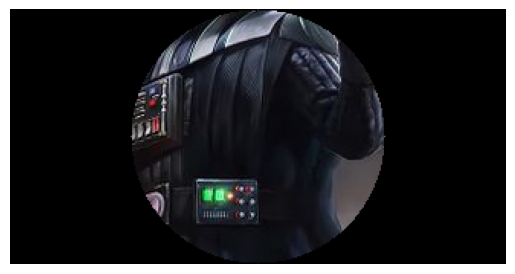

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/Users/210719/Downloads/argues.jpg')
cropped = image[100:600, 150:650]

h, w = cropped.shape[:2]

mask = np.zeros((h, w), dtype=np.uint8)
cv2.circle(mask, (w//2, h//2), min(h, w)//2, 255, -1)

output_image = cv2.bitwise_and(cropped, cropped, mask=mask)

plt.imshow(output_image[..., ::-1])
plt.axis("off")


In [ ]:
# Create a black color image
image = np.zeros((512, 512, 3), np.uint8)

# Define four points of the polygon
pts = np.array([[10, 50], [400, 50], [90, 200], [50, 500]], np.int32)

# Reshape points for cv2.polylines: required shape (-1, 1, 2)
pts = pts.reshape((-1, 1, 2))

# Draw the polygon
cv2.polylines(image, [pts], True, (0, 0, 255), 3)
# True → close the polygon
# (0, 0, 255) → red color in BGR
# 3 → thickness of the lines

# Display using OpenCV
cv2.imshow("Polygon", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Display using Matplotlib
plt.imshow(image[..., ::-1])  # Convert BGR → RGB
plt.title("Polygon")
plt.show()

In [ ]:
image = cv2.imread('/Users/210719/Downloads/argues.jpg')

# Create a matrix of ones, then multiply it by a scaler of 100
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 100

added = cv2.add(image, M)
subtracted = cv2.subtract(image, M)


plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(added[...,::-1]);plt.title("Added");
plt.subplot(133);plt.imshow(subtracted[...,::-1]);plt.title("Subtracted");


cv2.imshow("Original", image)
cv2.imshow("Added", added)
cv2.imshow("Subtracted", subtracted)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

* Enter the alpha value [0.1-3.0]:  2
* Enter the beta value [0-100]:  30


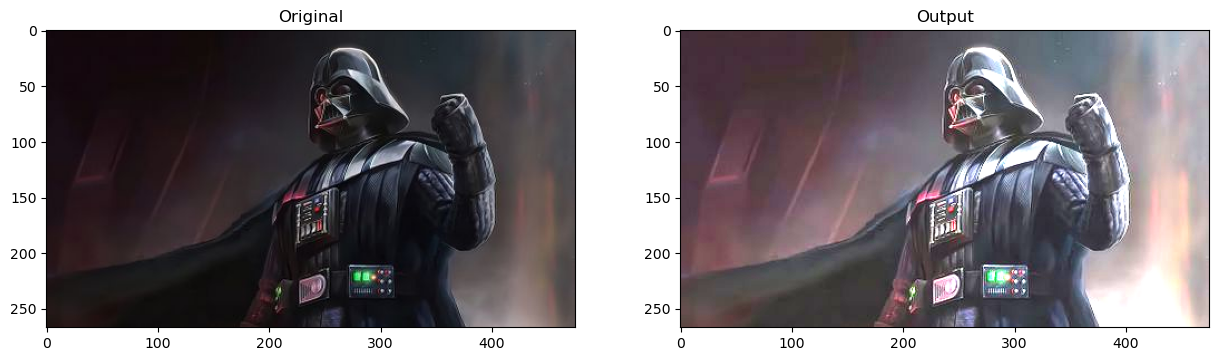

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/Users/210719/Downloads/argues.jpg")

new_image2 = np.zeros(image.shape, image.dtype)

alpha = float(input('* Enter the alpha value [0.1-3.0]: '))
beta = int(input('* Enter the beta value [0-100]: '))

# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image2[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)


plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(new_image2[...,::-1]);plt.title("Output");

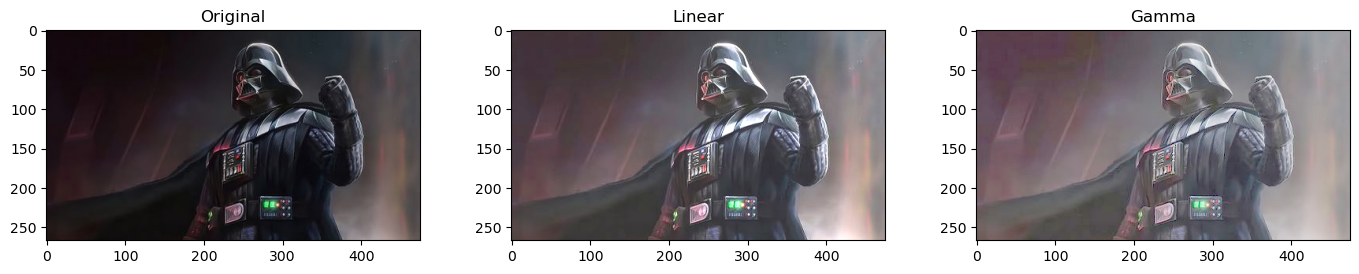

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set gamma value
gamma = 0.4  # Brightening factor for gamma correction

# Read two original images
img_original1 = cv2.imread("/Users/210719/Downloads/argues.jpg")


# Apply linear brightness and contrast adjustment
output_linear1 = cv2.convertScaleAbs(img_original1, alpha=1.3, beta=40)


# Prepare lookup table for gamma correction
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Apply gamma correction
output_gammacorrected1 = cv2.LUT(img_original1, lookUpTable)


# Display original, linear, and gamma-corrected images side by side
plt.figure(figsize=[17,6])

plt.subplot(231)
plt.imshow(img_original1[..., ::-1])
plt.title("Original")
plt.subplot(232)
plt.imshow(output_linear1[..., ::-1])
plt.title("Linear")
plt.subplot(233)
plt.imshow(output_gammacorrected1[..., ::-1])
plt.title("Gamma")

plt.show()